# General Stadistics of both datasets

## Dataset 1

### App Types

In [1]:
import pandas as pd

# Diccionario con los archivos de cada familia de malware y benignos
datasets = {
    "Dridex": "../Datasets/Dataset1/Dridex.csv",
    "Emotet": "../Datasets/Dataset1/Emotet.csv",
    "Hancitor": "../Datasets/Dataset1/Hancitor.csv",
    "Valak": "../Datasets/Dataset1/Valak.csv",
    "Benign": "../Datasets/Dataset1/Benign.csv",
}

# Almacenar estadísticas
stats = {}

for name, path in datasets.items():
    try:
        df = pd.read_csv(path, sep=";")
        
        # Contar filas benignas y maliciosas
        count_benign = (df["Type"] == 0).sum()
        count_malware = (df["Type"] == 'M').sum()
        
        # Obtener aplicaciones únicas y su cantidad
        app_counts = df["AppName"].value_counts().to_dict()
        ja4 = df['JA4hash'].count()
        types_ja4 = df["JA4hash"].value_counts().to_dict()
        ja4s = df['JA4Shash'].count()
        types_ja4s = df["JA4Shash"].value_counts().to_dict()
        ja4x = df['JA4X'].count()
        types_ja4x = df["JA4X"].value_counts().to_dict()

        # Guardar estadísticas
        stats[name] = {
            "Total filas": len(df),
            "Benignas": count_benign,
            "Malware": count_malware,
            'JA4': ja4,
            'JA4_unicas': len(types_ja4),
            'JA4S': ja4s,
            'JA4S_unicas': len(types_ja4s),
            'JA4X': ja4x,
            'JA4X_unicas': len(types_ja4x),
            "Tipos de aplicaciones": len(app_counts),
            "Aplicaciones y frecuencias": app_counts,
        }
        
    except Exception as e:
        print(f"Error procesando {name}: {e}")

# Mostrar estadísticas
for dataset, data in stats.items():
    print(f"\n Estadísticas de {dataset}:")
    print(f"  - Total de filas: {data['Total filas']}")
    print(f"  - Benignas: {data['Benignas']}")
    print(f"  - Malware: {data['Malware']}")
    print(f"  - JA4: {data['JA4']}")
    print(f"  - JA4 únicos: {data['JA4_unicas']}")
    print(f"  - JA4S: {data['JA4S']}")
    print(f"  - JA4S únicos: {data['JA4S_unicas']}")
    print(f"  - JA4X: {data['JA4X']}")
    print(f"  - JA4X únicos: {data['JA4X_unicas']}")
    print(f"  - Tipos de aplicaciones: {data['Tipos de aplicaciones']}")
    print("  - Aplicaciones y frecuencias:")
    for app, count in data["Aplicaciones y frecuencias"].items():
        print(f"    {app}: {count}")





 Estadísticas de Dridex:
  - Total de filas: 1686
  - Benignas: 0
  - Malware: 1681
  - JA4: 1681
  - JA4 únicos: 27
  - JA4S: 1681
  - JA4S únicos: 56
  - JA4X: 1600
  - JA4X únicos: 32
  - Tipos de aplicaciones: 1
  - Aplicaciones y frecuencias:
    Dridex: 1681

 Estadísticas de Emotet:
  - Total de filas: 1927
  - Benignas: 0
  - Malware: 1567
  - JA4: 1567
  - JA4 únicos: 25
  - JA4S: 1531
  - JA4S únicos: 75
  - JA4X: 1550
  - JA4X únicos: 107
  - Tipos de aplicaciones: 1
  - Aplicaciones y frecuencias:
    Emotet: 1567

 Estadísticas de Hancitor:
  - Total de filas: 5743
  - Benignas: 0
  - Malware: 5743
  - JA4: 5743
  - JA4 únicos: 13
  - JA4S: 5682
  - JA4S únicos: 53
  - JA4X: 566
  - JA4X únicos: 38
  - Tipos de aplicaciones: 1
  - Aplicaciones y frecuencias:
    Hancitor: 5743

 Estadísticas de Valak:
  - Total de filas: 349
  - Benignas: 0
  - Malware: 349
  - JA4: 349
  - JA4 únicos: 9
  - JA4S: 349
  - JA4S únicos: 24
  - JA4X: 300
  - JA4X únicos: 14
  - Tipos de apli

In [2]:
df_stats = pd.DataFrame.from_dict(stats, orient='index')


<Figure size 1000x500 with 0 Axes>

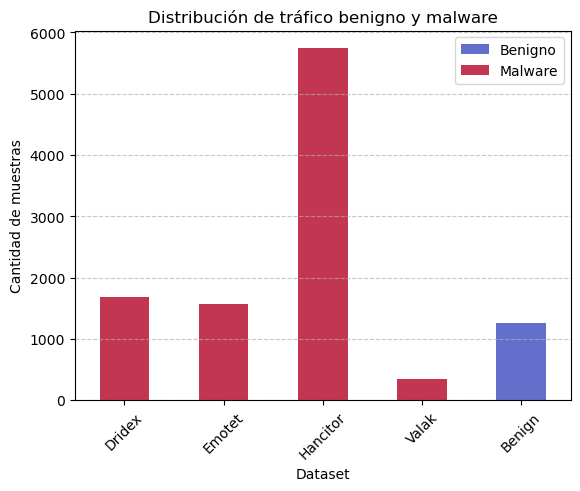

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
df_stats[['Benignas', 'Malware']].plot(kind='bar', stacked=True, colormap='coolwarm', alpha=0.8)
plt.title("Distribución de tráfico benigno y malware")
plt.xlabel("Dataset")
plt.ylabel("Cantidad de muestras")
plt.xticks(rotation=45)
plt.legend(["Benigno", "Malware"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

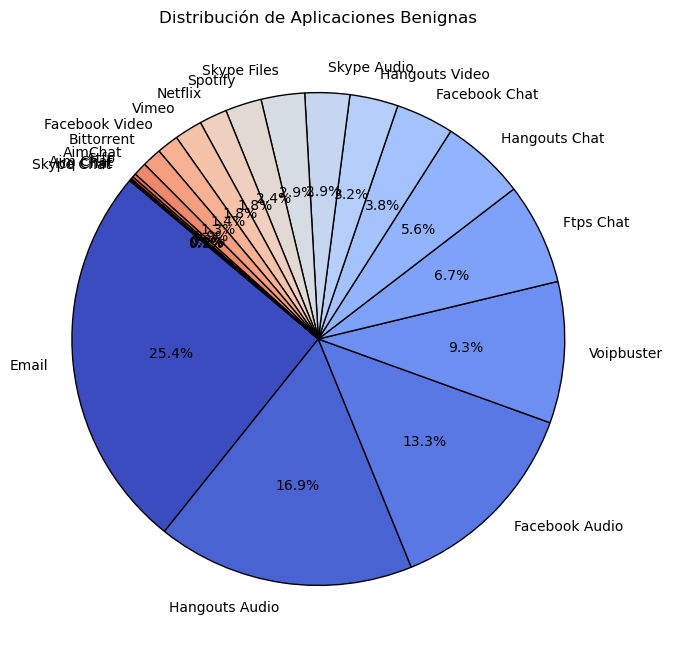

In [4]:
plt.figure(figsize=(8, 8))
pd.Series(df_stats.loc['Benign', 'Aplicaciones y frecuencias']).plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="coolwarm", wedgeprops={'edgecolor': 'black'})
plt.title("Distribución de Aplicaciones Benignas")
plt.ylabel("")  # Ocultar etiqueta del eje Y
plt.show()

<Figure size 1000x500 with 0 Axes>

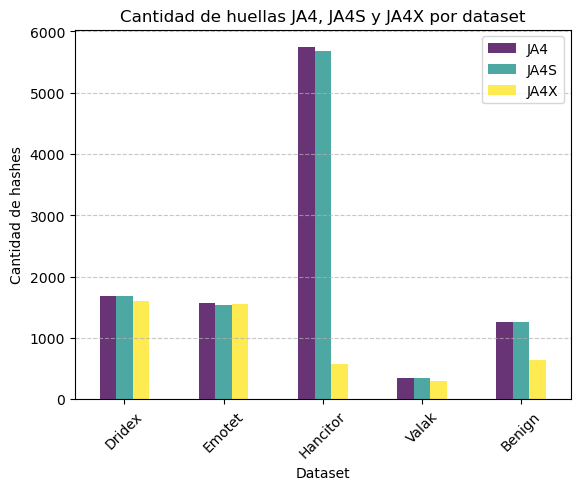

In [5]:
plt.figure(figsize=(10, 5))
df_stats[['JA4', 'JA4S', 'JA4X']].plot(kind='bar', colormap='viridis', alpha=0.8)
plt.title("Cantidad de huellas JA4, JA4S y JA4X por dataset")
plt.xlabel("Dataset")
plt.ylabel("Cantidad de hashes")
plt.xticks(rotation=45)
plt.legend(["JA4", "JA4S", "JA4X"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x500 with 0 Axes>

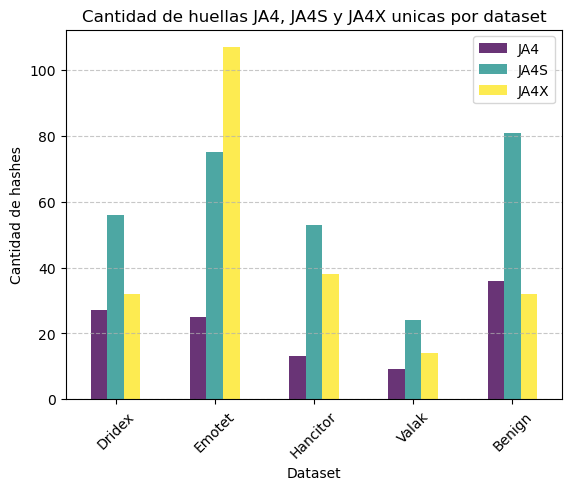

In [6]:
plt.figure(figsize=(10, 5))
df_stats[['JA4_unicas', 'JA4S_unicas', 'JA4X_unicas']].plot(kind='bar', colormap='viridis', alpha=0.8)
plt.title("Cantidad de huellas JA4, JA4S y JA4X unicas por dataset")
plt.xlabel("Dataset")
plt.ylabel("Cantidad de hashes")
plt.xticks(rotation=45)
plt.legend(["JA4", "JA4S", "JA4X"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### JA4 fingerprints per year

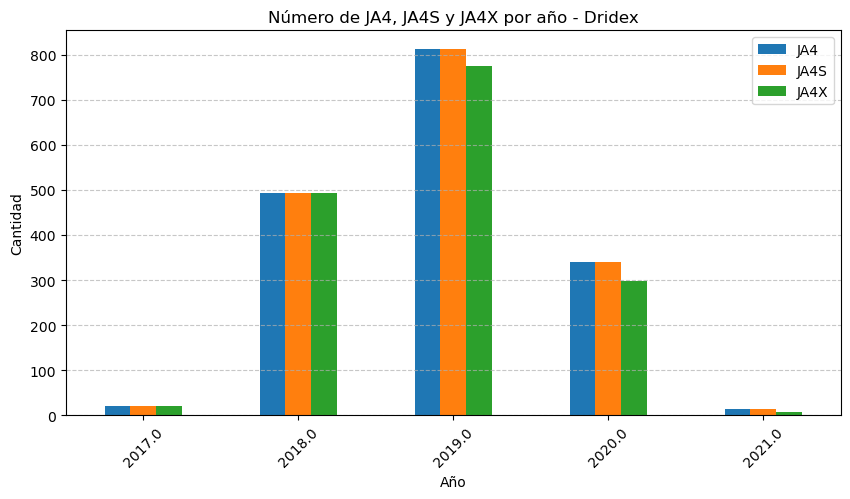

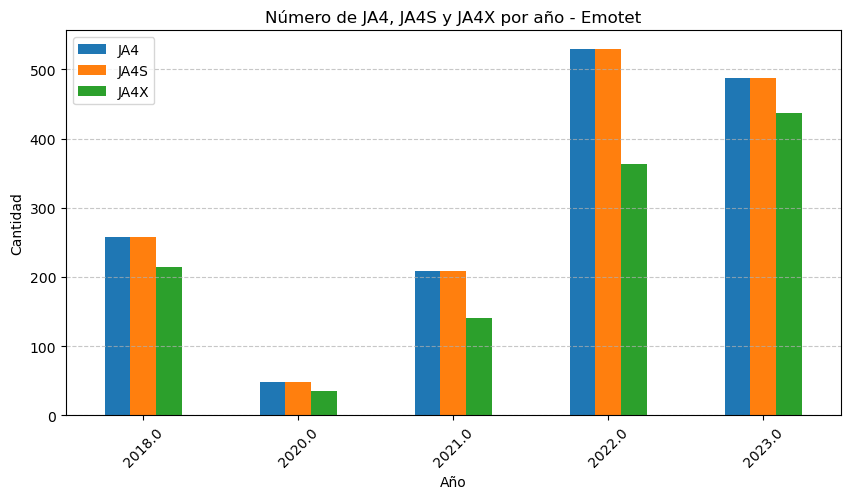

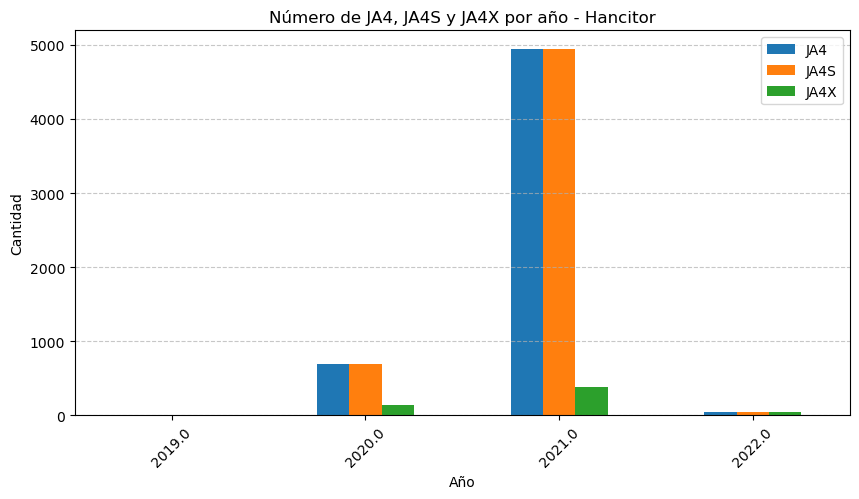

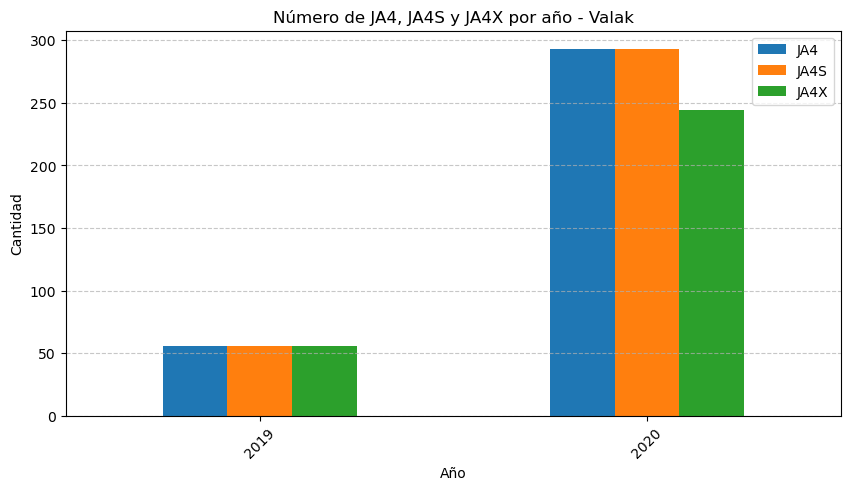

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para extraer el año del Filename
def extract_year(filename):
    try:
        return int(filename.split('-')[0])  # Extrae los primeros 4 caracteres antes del primer '-'
    except:
        return None  # Si hay error, retorna None

# Diccionario para guardar resultados
ja4_by_year = {}

# Procesar cada dataset de malware
for name, path in datasets.items():
    if name != "Benign":  # Filtramos solo malware
        df = pd.read_csv(path, sep=";")

        # Extraer año
        df["Year"] = df["Filename"].apply(extract_year)

        # Agrupar por año y contar JA4, JA4S y JA4X
        yearly_counts = df.groupby("Year")[["JA4hash", "JA4Shash", "JA4X"]].count()

        # Guardar en el diccionario
        ja4_by_year[name] = yearly_counts

        # Graficar
        yearly_counts.plot(kind="bar", figsize=(10, 5))
        plt.title(f"Número de JA4, JA4S y JA4X por año - {name}")
        plt.xlabel("Año")
        plt.ylabel("Cantidad")
        plt.legend(["JA4", "JA4S", "JA4X"])
        plt.xticks(rotation=45)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.show()

## Dataset 2

In [10]:
import pandas as pd

# Diccionario con los archivos de cada familia de malware y benignos
datasets = {
    "desktop-apps": "../Datasets/Dataset2/desktop-apps.csv",
    "desktop-malware": "../Datasets/Dataset2/desktop-malware.csv",
    "mobile-apps": "../Datasets/Dataset2/mobile-apps.csv",
    "mobile-malware": "../Datasets/Dataset2/mobile-malware.csv",
}

# Almacenar estadísticas
stats = {}

for name, path in datasets.items():
    try:
        df = pd.read_csv(path, sep=";")
        
        # Contar filas benignas y maliciosas
        count_benign = (df["Type"] == 0).sum()
        count_malware = (df["Type"] == 'M').sum()
        
        # Obtener aplicaciones únicas y su cantidad
        app_counts = df["AppName"].value_counts().to_dict()
        ja4 = df['JA4hash'].count()
        types_ja4 = df["JA4hash"].value_counts().to_dict()
        ja4s = df['JA4Shash'].count()
        types_ja4s = df["JA4Shash"].value_counts().to_dict()
        ja4x = df['JA4X'].count()
        types_ja4x = df["JA4X"].value_counts().to_dict()

        # Guardar estadísticas
        stats[name] = {
            "Total filas": len(df),
            "Benignas": count_benign,
            "Malware": count_malware,
            'JA4': ja4,
            'JA4_unicas': len(types_ja4),
            'JA4S': ja4s,
            'JA4S_unicas': len(types_ja4s),
            'JA4X': ja4x,
            'JA4X_unicas': len(types_ja4x),
            "Tipos de aplicaciones": len(app_counts),
            "Aplicaciones y frecuencias": app_counts,
        }
        
    except Exception as e:
        print(f"Error procesando {name}: {e}")

# Mostrar estadísticas
for dataset, data in stats.items():
    print(f"\n Estadísticas de {dataset}:")
    print(f"  - Total de filas: {data['Total filas']}")
    print(f"  - Benignas: {data['Benignas']}")
    print(f"  - Malware: {data['Malware']}")
    print(f"  - JA4: {data['JA4']}")
    print(f"  - JA4 únicos: {data['JA4_unicas']}")
    print(f"  - JA4S: {data['JA4S']}")
    print(f"  - JA4S únicos: {data['JA4S_unicas']}")
    print(f"  - JA4X: {data['JA4X']}")
    print(f"  - JA4X únicos: {data['JA4X_unicas']}")
    print(f"  - Tipos de aplicaciones: {data['Tipos de aplicaciones']}")
    print("  - Aplicaciones y frecuencias:")
    for app, count in data["Aplicaciones y frecuencias"].items():
        print(f"    {app}: {count}")





 Estadísticas de desktop-apps:
  - Total de filas: 471
  - Benignas: 469
  - Malware: 0
  - JA4: 469
  - JA4 únicos: 16
  - JA4S: 468
  - JA4S únicos: 46
  - JA4X: 209
  - JA4X únicos: 28
  - Tipos de aplicaciones: 26
  - Aplicaciones y frecuencias:
    SearchApp Exe: 132
    msedge Exe: 82
    Maps Exe: 62
    msedgewebview2 Exe: 38
    Firefox Exe: 34
    PrimeVideo Exe: 21
    AppleTV Exe: 13
    Sky_Go Exe: 12
    HP.Omen.OmenCommandCenter Exe: 9
    FourNet Exe: 8
    OmenCommandCenterBackground Exe: 8
    AmazonMusic Exe: 7
    Messenger Exe: 6
    AMPLibraryAgent Exe: 6
    smartscreen Exe: 5
    Spotify Exe: 5
    Trello Exe: 5
    ms-teams Exe: 3
    Telegram Exe: 3
    iTunes Exe: 2
    RuntimeBroker Exe: 2
    Skype Exe: 2
    AmazonMusicHelper Exe: 1
    GameBar Exe: 1
    pwsh Exe: 1
    BackgroundTaskHost Exe: 1

 Estadísticas de desktop-malware:
  - Total de filas: 9549
  - Benignas: 0
  - Malware: 9478
  - JA4: 9478
  - JA4 únicos: 64
  - JA4S: 7325
  - JA4S únicos: 19

In [11]:
df_stats = pd.DataFrame.from_dict(stats, orient='index')

<Figure size 1000x500 with 0 Axes>

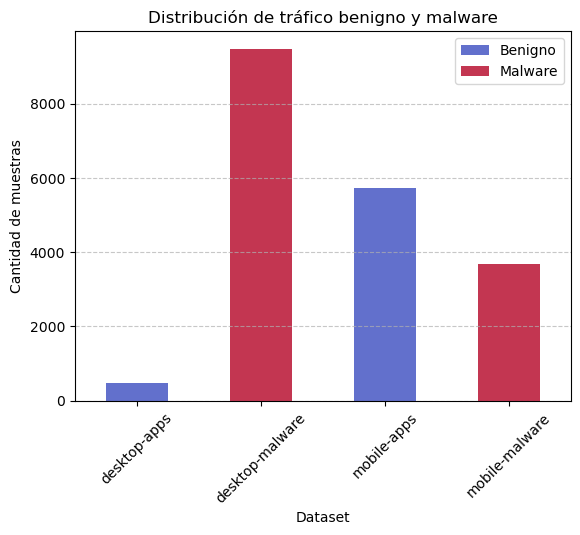

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
df_stats[['Benignas', 'Malware']].plot(kind='bar', stacked=True, colormap='coolwarm', alpha=0.8)
plt.title("Distribución de tráfico benigno y malware")
plt.xlabel("Dataset")
plt.ylabel("Cantidad de muestras")
plt.xticks(rotation=45)
plt.legend(["Benigno", "Malware"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

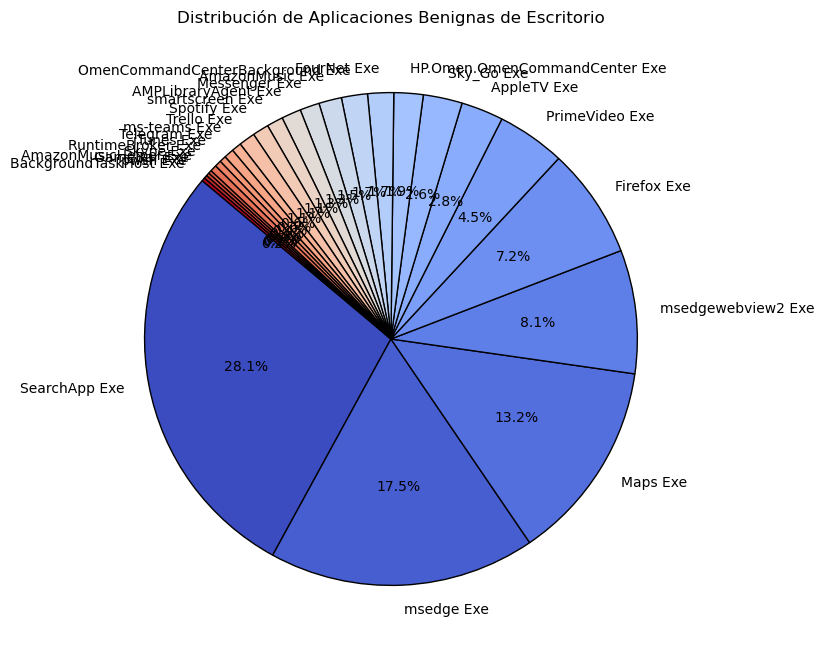

In [13]:
plt.figure(figsize=(8, 8))
pd.Series(df_stats.loc['desktop-apps', 'Aplicaciones y frecuencias']).plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="coolwarm", wedgeprops={'edgecolor': 'black'})
plt.title("Distribución de Aplicaciones Benignas de Escritorio")
plt.ylabel("")  # Ocultar etiqueta del eje Y
plt.show()

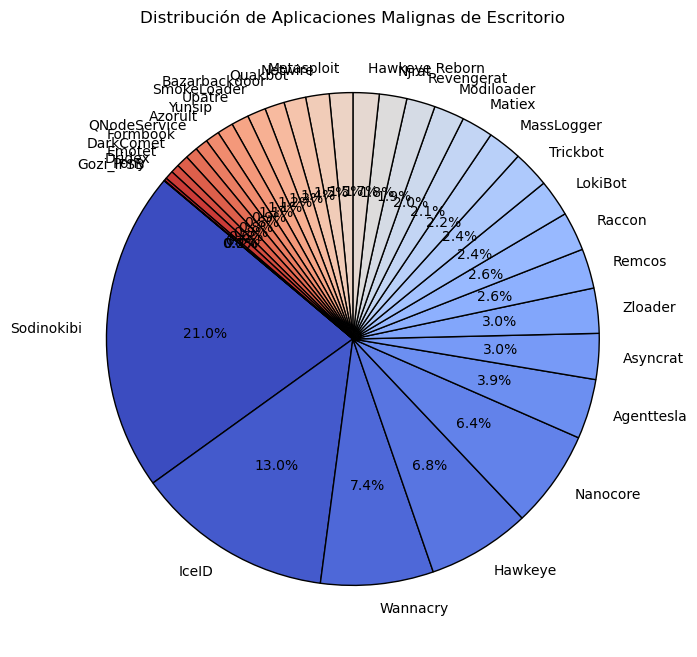

In [14]:
plt.figure(figsize=(8, 8))
pd.Series(df_stats.loc['desktop-malware', 'Aplicaciones y frecuencias']).plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="coolwarm", wedgeprops={'edgecolor': 'black'})
plt.title("Distribución de Aplicaciones Malignas de Escritorio")
plt.ylabel("")  # Ocultar etiqueta del eje Y
plt.show()

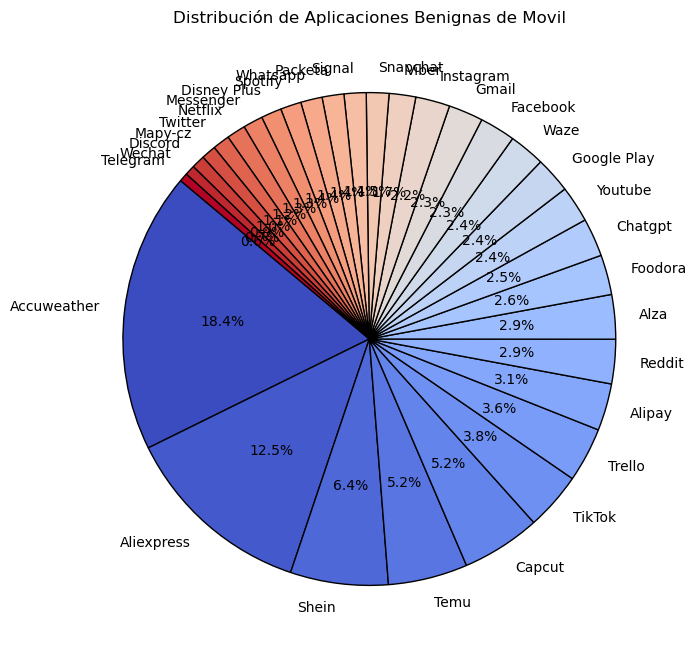

In [15]:
plt.figure(figsize=(8, 8))
pd.Series(df_stats.loc['mobile-apps', 'Aplicaciones y frecuencias']).plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap="coolwarm", wedgeprops={'edgecolor': 'black'})
plt.title("Distribución de Aplicaciones Benignas de Movil")
plt.ylabel("")  # Ocultar etiqueta del eje Y
plt.show()

<Figure size 1000x500 with 0 Axes>

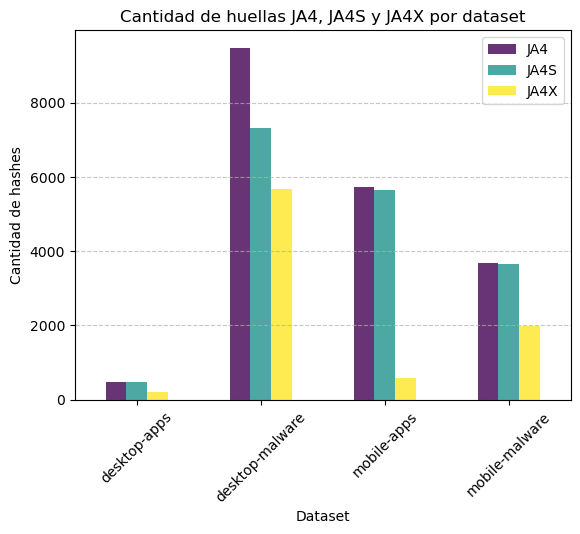

In [16]:
plt.figure(figsize=(10, 5))
df_stats[['JA4', 'JA4S', 'JA4X']].plot(kind='bar', colormap='viridis', alpha=0.8)
plt.title("Cantidad de huellas JA4, JA4S y JA4X por dataset")
plt.xlabel("Dataset")
plt.ylabel("Cantidad de hashes")
plt.xticks(rotation=45)
plt.legend(["JA4", "JA4S", "JA4X"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x500 with 0 Axes>

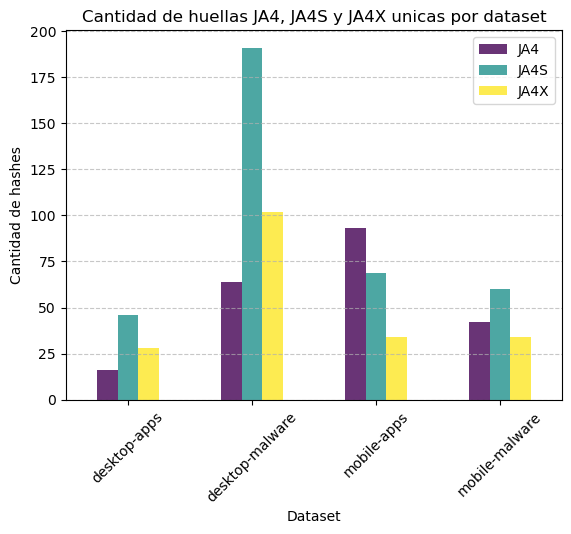

In [17]:
plt.figure(figsize=(10, 5))
df_stats[['JA4_unicas', 'JA4S_unicas', 'JA4X_unicas']].plot(kind='bar', colormap='viridis', alpha=0.8)
plt.title("Cantidad de huellas JA4, JA4S y JA4X unicas por dataset")
plt.xlabel("Dataset")
plt.ylabel("Cantidad de hashes")
plt.xticks(rotation=45)
plt.legend(["JA4", "JA4S", "JA4X"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### JA4, JA4S, JA4X Unicas para cada dataset y en comun

In [18]:
import pandas as pd

# Diccionario para almacenar las tablas
tables = {}

# Procesar cada dataset
for name, path in datasets.items():
    df = pd.read_csv(path, sep=";")
    
    # Crear las combinaciones de huellas
    df["JA4+JA4S"] = df["JA4hash"].astype(str) + "_" + df["JA4Shash"].astype(str)
    df["JA4+JA4S+JA4X"] = df["JA4hash"].astype(str) + "_" + df["JA4Shash"].astype(str) + "_" + df["JA4X"].astype(str)

    # Función para calcular métricas
    def calculate_stats(column):
        total = df[column].count()
        unique = df[column].nunique()
        most_common = df[column].value_counts().idxmax() if total > 0 else None
        most_common_freq = df[column].value_counts().max() if total > 0 else 0
        mean_freq = total / unique if unique > 0 else 0
        return [total, unique, most_common, most_common_freq, round(mean_freq, 2)]

    # Lista con las métricas
    data = []
    columns = ["Total", "Únicos", "Huella más frecuente", "Frecuencia", "Frecuencia media"]
    index_labels = ["JA4hash", "JA4Shash", "JA4X", "JA4+JA4S", "JA4+JA4S+JA4X"]

    for col in index_labels:
        data.append(calculate_stats(col))

    # Crear el DataFrame correctamente
    stats_table = pd.DataFrame(data, index=index_labels, columns=columns)

    # Guardar en el diccionario
    tables[name] = stats_table

    # Mostrar la tabla
    print(f"\n Tabla de estadísticas para {name}:\n")
    print(stats_table)





 Tabla de estadísticas para desktop-apps:

               Total  Únicos  \
JA4hash          469      16   
JA4Shash         468      46   
JA4X             209      28   
JA4+JA4S         471      69   
JA4+JA4S+JA4X    471      95   

                                            Huella más frecuente  Frecuencia  \
JA4hash                     t12d1909h2_d83cc789557e_7af1ed941c26         255   
JA4Shash                               t1206h2_c030_e1dda4771ae8          66   
JA4X           a373a9f83c6b_2bab15409345_0f2217ba412e, 7d5dbb...          65   
JA4+JA4S       t12d1909h2_d83cc789557e_7af1ed941c26_t1206h2_c...          66   
JA4+JA4S+JA4X  t13d1516h2_8daaf6152771_02713d6af862_t130200_1...          39   

               Frecuencia media  
JA4hash                   29.31  
JA4Shash                  10.17  
JA4X                       7.46  
JA4+JA4S                   6.83  
JA4+JA4S+JA4X              4.96  

 Tabla de estadísticas para desktop-malware:

               Total  Únicos  \

In [19]:
import pandas as pd

# Diccionario para almacenar las tablas
tables = {}

# Procesar cada dataset

df = pd.read_csv("../Datasets/Dataset2/desktop-malware.csv", sep=";")

apps = ['Emotet', 'Dridex']

for name in apps:
    df_app = df[df['AppName'] == name]

    # Crear las combinaciones de huellas
    df_app["JA4+JA4S"] = df_app["JA4hash"].astype(str) + "_" + df_app["JA4Shash"].astype(str)
    df_app["JA4+JA4S+JA4X"] = df_app["JA4hash"].astype(str) + "_" + df_app["JA4Shash"].astype(str) + "_" + df_app["JA4X"].astype(str)


    # Función para calcular métricas
    def calculate_stats(column):
        total = df_app[column].count()
        unique = df_app[column].nunique()
        most_common = df_app[column].value_counts().idxmax() if total > 0 else None
        most_common_freq = df_app[column].value_counts().max() if total > 0 else 0
        mean_freq = total / unique if unique > 0 else 0
        return [total, unique, most_common, most_common_freq, round(mean_freq, 2)]

    # Lista con las métricas
    data = []
    columns = ["Total", "Únicos", "Huella más frecuente", "Frecuencia", "Frecuencia media"]
    index_labels = ["JA4hash", "JA4Shash", "JA4X", "JA4+JA4S", "JA4+JA4S+JA4X"]

    for col in index_labels:
        data.append(calculate_stats(col))

    # Crear el DataFrame correctamente
    stats_table = pd.DataFrame(data, index=index_labels, columns=columns)

    # Guardar en el diccionario
    tables[name] = stats_table

    # Mostrar la tabla
    print(f"\n Tabla de estadísticas para {name}:\n")
    print(stats_table)


 Tabla de estadísticas para Emotet:

               Total  Únicos  \
JA4hash           53       2   
JA4Shash          53       4   
JA4X              52       1   
JA4+JA4S          53       4   
JA4+JA4S+JA4X     53       4   

                                            Huella más frecuente  Frecuencia  \
JA4hash                     t12d1909h2_d83cc789557e_7af1ed941c26          52   
JA4Shash                               t1205h2_c030_7136cef64a82          42   
JA4X           a373a9f83c6b_2bab15409345_0f2217ba412e, 7d5dbb...          52   
JA4+JA4S       t12d1909h2_d83cc789557e_7af1ed941c26_t1205h2_c...          42   
JA4+JA4S+JA4X  t12d1909h2_d83cc789557e_7af1ed941c26_t1205h2_c...          42   

               Frecuencia media  
JA4hash                   26.50  
JA4Shash                  13.25  
JA4X                      52.00  
JA4+JA4S                  13.25  
JA4+JA4S+JA4X             13.25  

 Tabla de estadísticas para Dridex:

               Total  Únicos  \
JA4hash       

/tmp/ipykernel_30318/3177577086.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app["JA4+JA4S"] = df_app["JA4hash"].astype(str) + "_" + df_app["JA4Shash"].astype(str)
/tmp/ipykernel_30318/3177577086.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app["JA4+JA4S+JA4X"] = df_app["JA4hash"].astype(str) + "_" + df_app["JA4Shash"].astype(str) + "_" + df_app["JA4X"].astype(str)
/tmp/ipykernel_30318/3177577086.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da